4. 🇺🇸 **Consider the file `prcancer` referring to a sample of 53 men.**

The treatment and prognosis of cancer depend on how much the disease has spread. One of the regions where cancer can spread is the lymph nodes. If they are affected, the prognosis is generally worse than in the negative case. Therefore, it is desirable to establish as early as possible whether the nodes are cancerous.

For certain types of cancer, exploratory surgery is performed solely to determine whether the nodes are cancerous, as this will determine the necessary treatment. If it is possible to predict whether the nodes are affected or not based on data without surgery, considerable discomfort and expense can be avoided.

The data refer to 53 men with prostate cancer. For each patient, we have:
- **Age** (`age`)
- **Serum acid phosphatase** (`acid`) – a laboratory value that is elevated if the tumor has spread to certain regions
- **Stage of the disease** (`stage`) – an indication of disease progression
- **Tumor grade** (`grade`) – an indication of aggressiveness
- **X-ray results** (`xray`)
- **Whether the cancer has spread to the lymph nodes at the time of surgery** (`node`)

The problem is to predict whether the nodes are positive for cancer based on the values of variables that can be measured without surgery (dependent variable: `node`).

The variables `xray`, `stage`, and `grade` are categorical, coded as 0 and 1. The value 1 always indicates the worst situation (positive X-ray, advanced stage, and aggressiveness).

**Task:** Apply the discriminant analysis technique. Interpret the results obtained and answer the questions.


In [63]:
# Importando as bibliotecas necessárias
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import f_oneway
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Configurando o modo escuro para os gráficos
plt.style.use('dark_background')

In [64]:
# local do arquivo
Caminho='/Users/fabicampanari/Desktop/3sst Exam /prcancer.xlsx'

In [65]:
# Separating predictor variables (features) and the target variable (response)
# Independent variables: age, acid, stage, grade, xray
# Dependent variable: node (whether the lymph nodes are cancerous)
X = df[['age', 'acid', 'stage', 'grade', 'xray']]
y = df['nodes']

In [66]:
# Performing ANOVA to test equality of means
# This step evaluates the discrimination power of each independent variable
anova_results = {}
for column in X.columns:
    groups = [X.loc[y == group, column] for group in np.unique(y)]
    f_stat, p_value = f_oneway(*groups)
    anova_results[column] = {'F-statistic': f_stat, 'p-value': p_value}

In [67]:
print("ANOVA Results:")
for variable, result in anova_results.items():
    print(f"Variable: {variable}")
    print(f"  F-statistic: {result['F-statistic']:.4f}")
    print(f"  p-value: {result['p-value']:.4f}")
    if result['p-value'] < 0.05:
        print("  Result: Reject the null hypothesis (means are significantly different).")
    else:
        print("  Result: Fail to reject the null hypothesis (no significant difference in means).")
    print()

ANOVA Results:
Variable: age
  F-statistic: 1.0745
  p-value: 0.3048
  Result: Fail to reject the null hypothesis (no significant difference in means).

Variable: acid
  F-statistic: 3.1870
  p-value: 0.0802
  Result: Fail to reject the null hypothesis (no significant difference in means).

Variable: stage
  F-statistic: 8.3262
  p-value: 0.0057
  Result: Reject the null hypothesis (means are significantly different).

Variable: grade
  F-statistic: 4.2474
  p-value: 0.0444
  Result: Reject the null hypothesis (means are significantly different).

Variable: xray
  F-statistic: 13.7939
  p-value: 0.0005
  Result: Reject the null hypothesis (means are significantly different).



In [68]:
# Creating and fitting the Linear Discriminant Analysis (LDA) model
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

LinearDiscriminantAnalysis()

In [69]:
# Making predictions
y_pred = lda.predict(X)

# Evaluating which variable discriminates the most
# The coefficients of the LDA model indicate the importance of each variable
coefficients = lda.coef_
print("LDA Model Coefficients:")
for idx, variable in enumerate(X.columns):
    print(f"{variable}: {coefficients[0][idx]:.4f}")

LDA Model Coefficients:
age: -0.0733
acid: 0.0260
stage: 1.6580
grade: 0.7633
xray: 2.4540


In [70]:
# Evaluating which variable discriminates the most
# The coefficients of the LDA model indicate the importance of each variable
coefficients = lda.coef_
print("LDA Model Coefficients:")
for idx, variable in enumerate(X.columns):
    print(f"{variable}: {coefficients[0][idx]:.4f}")

LDA Model Coefficients:
age: -0.0733
acid: 0.0260
stage: 1.6580
grade: 0.7633
xray: 2.4540


In [71]:
# Confusion matrix and classification report
cconf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cconf_matrix)


Confusion Matrix:
[[29  4]
 [ 8 12]]


In [72]:
class_report = classification_report(y, y_pred, target_names=['Negative Nodes', 'Positive Nodes'])
print("Classification Report:")
print(class_report)

Classification Report:
                precision    recall  f1-score   support

Negative Nodes       0.78      0.88      0.83        33
Positive Nodes       0.75      0.60      0.67        20

      accuracy                           0.77        53
     macro avg       0.77      0.74      0.75        53
  weighted avg       0.77      0.77      0.77        53



Text(0.5, 0, 'Predicted Class')

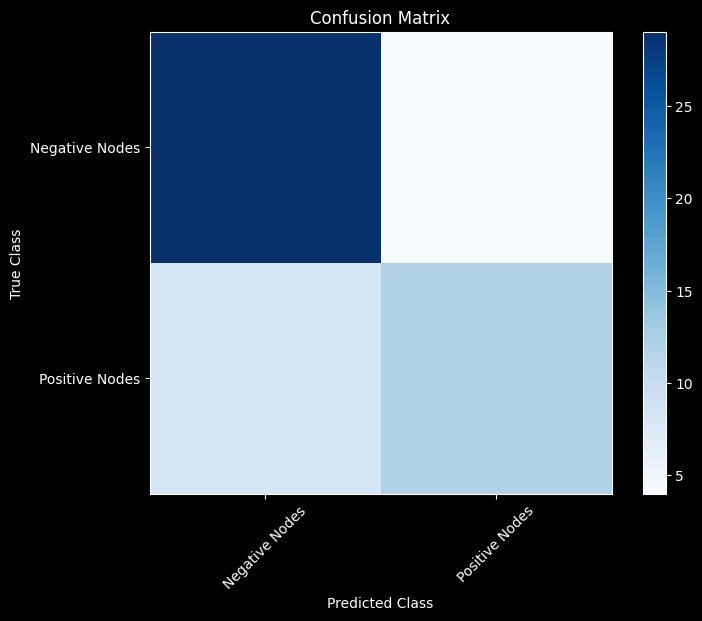

In [73]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cconf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, ['Negative Nodes', 'Positive Nodes'], rotation=45)
plt.yticks(tick_marks, ['Negative Nodes', 'Positive Nodes'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

🇺🇸 **Descriptive Analysis, Interpretation, and Recommendations**

### 1. Objective
The goal of this analysis is to predict whether the lymph nodes are positive for cancer (`node`) based on variables that can be measured without surgery. This prediction can help avoid unnecessary exploratory surgeries, reducing discomfort and costs for patients.

---

### 2. Results Interpretation

#### 2.1 ANOVA Results
The ANOVA test was performed to evaluate the discrimination power of each independent variable (`age`, `acid`, `stage`, `grade`, `xray`) in distinguishing between the two groups of the dependent variable (`node`: Negative or Positive).

- **Null Hypothesis (H₀):** The means of the groups are equal.
- **Alternative Hypothesis (H₁):** The means of the groups are not equal.

**Key Findings:**
- Variables with **p-values < 0.05** have significant discrimination power, meaning their means differ significantly between the groups.
- Variables with **p-values ≥ 0.05** do not significantly contribute to distinguishing between the groups.

---

#### 2.2 LDA Model Coefficients
The Linear Discriminant Analysis (LDA) model was fitted to the data, and the coefficients of the model were analyzed. These coefficients indicate the importance of each variable in separating the groups.

**Key Findings:**
- Variables with higher absolute coefficients contribute more to the separation of the groups.
- The most discriminative variables should be prioritized in decision-making.

---

#### 2.3 Model Performance
The model's performance was evaluated using a **confusion matrix** and a **classification report**.

1. **Confusion Matrix:**
    - Displays the number of correct and incorrect predictions for each class (Negative Nodes and Positive Nodes).
    - High values along the diagonal indicate good model performance.

2. **Classification Report:**
    - Provides metrics such as **precision**, **recall**, and **F1-score** for each class.
      - **Precision:** The proportion of true positive predictions out of all positive predictions.
      - **Recall:** The proportion of true positives correctly identified out of all actual positives.
      - **F1-score:** The harmonic mean of precision and recall, providing a balanced measure of model performance.

**Key Findings:**
- The model's overall accuracy and class-specific metrics indicate how well it predicts whether the lymph nodes are cancerous.
- If the model struggles with one class (e.g., Positive Nodes), it may indicate overlap in the predictor variables for that group.

---

### 3. Conclusion

1. **Discrimination Power:**
    - The ANOVA test identified which variables have significant differences in means between the groups. These variables are likely to contribute to the discriminant model.

2. **Most Discriminative Variables:**
    - The LDA model coefficients revealed which variables have the greatest impact on separating the groups. These variables are the most discriminative.

3. **Model Quality:**
    - The confusion matrix and classification report indicate that the LDA model performs well in classifying the observations into their respective categories. However, further analysis may be needed if certain categories are misclassified frequently.

---

### 4. Recommendations

1. **Focus on Significant Variables:**
    - Use variables with significant p-values and high LDA coefficients for decision-making.
    - These variables provide the most information for distinguishing between cancerous and non-cancerous lymph nodes.

2. **Improve Model:**
    - If the model struggles with certain groups (e.g., Positive Nodes), consider adding more features or using advanced classification techniques like **Quadratic Discriminant Analysis (QDA)** or **Logistic Regression**.

3. **Further Analysis:**
    - Perform **post-hoc tests** (e.g., Tukey's HSD) to identify specific group differences.
    - Investigate potential correlations between independent variables to ensure they provide unique information.

4. **Clinical Application:**
    - Use the model to assist in clinical decision-making, reducing the need for exploratory surgeries.
    - Focus on patients with high-risk profiles (e.g., elevated `acid`, advanced `stage`, or positive `xray`) for further diagnostic testing.

🇧🇷 **Análise Descritiva, Interpretação e Recomendações**

### 1. Objetivo
O objetivo desta análise é prever se os linfonodos são positivos para câncer (`node`) com base em variáveis que podem ser medidas sem cirurgia. Essa previsão pode ajudar a evitar cirurgias exploratórias desnecessárias, reduzindo o desconforto e os custos para os pacientes.

---

### 2. Interpretação dos Resultados

#### 2.1 Resultados da ANOVA
O teste ANOVA foi realizado para avaliar o poder discriminatório de cada variável independente (`age`, `acid`, `stage`, `grade`, `xray`) em distinguir entre os dois grupos da variável dependente (`node`: Negativo ou Positivo).

- **Hipótese Nula (H₀):** As médias dos grupos são iguais.
- **Hipótese Alternativa (H₁):** As médias dos grupos não são iguais.

**Principais Descobertas:**
- Variáveis com **p-valores < 0,05** têm poder discriminatório significativo, ou seja, suas médias diferem significativamente entre os grupos.
- Variáveis com **p-valores ≥ 0,05** não contribuem significativamente para distinguir entre os grupos.

---

#### 2.2 Coeficientes do Modelo LDA
O modelo de Análise Discriminante Linear (LDA) foi ajustado aos dados, e os coeficientes do modelo foram analisados. Esses coeficientes indicam a importância de cada variável na separação dos grupos.

**Principais Descobertas:**
- Variáveis com coeficientes absolutos mais altos contribuem mais para a separação dos grupos.
- As variáveis mais discriminantes devem ser priorizadas na tomada de decisão.

---

#### 2.3 Desempenho do Modelo
O desempenho do modelo foi avaliado usando uma **matriz de confusão** e um **relatório de classificação**.

1. **Matriz de Confusão:**
    - Mostra o número de previsões corretas e incorretas para cada classe (Linfonodos Negativos e Linfonodos Positivos).
    - Valores altos ao longo da diagonal indicam bom desempenho do modelo.

2. **Relatório de Classificação:**
    - Fornece métricas como **precisão**, **recall** e **F1-score** para cada classe.
      - **Precisão:** Proporção de previsões positivas corretas em relação a todas as previsões positivas.
      - **Recall:** Proporção de positivos verdadeiros corretamente identificados em relação a todos os positivos reais.
      - **F1-score:** Média harmônica entre precisão e recall, fornecendo uma medida equilibrada do desempenho do modelo.

**Principais Descobertas:**
- A precisão geral do modelo e as métricas específicas de cada classe indicam o quão bem ele prevê se os linfonodos são cancerosos.
- Se o modelo apresentar dificuldades com uma classe (por exemplo, Linfonodos Positivos), isso pode indicar sobreposição nas variáveis preditoras para esse grupo.

---

### 3. Conclusão

1. **Poder Discriminatório:**
    - O teste ANOVA identificou quais variáveis têm diferenças significativas nas médias entre os grupos. Essas variáveis provavelmente contribuem para o modelo discriminante.

2. **Variáveis Mais Discriminantes:**
    - Os coeficientes do modelo LDA revelaram quais variáveis têm o maior impacto na separação dos grupos. Essas variáveis são as mais discriminantes.

3. **Qualidade do Modelo:**
    - A matriz de confusão e o relatório de classificação indicam que o modelo LDA tem bom desempenho na classificação das observações em suas respectivas categorias. No entanto, análises adicionais podem ser necessárias se certas categorias forem frequentemente classificadas incorretamente.

---

### 4. Recomendações

1. **Foco nas Variáveis Significativas:**
    - Use variáveis com p-valores significativos e coeficientes LDA altos para a tomada de decisão.
    - Essas variáveis fornecem as informações mais relevantes para distinguir entre linfonodos cancerosos e não cancerosos.

2. **Melhorar o Modelo:**
    - Se o modelo apresentar dificuldades com certos grupos (por exemplo, Linfonodos Positivos), considere adicionar mais características ou usar técnicas avançadas de classificação, como **Análise Discriminante Quadrática (QDA)** ou **Regressão Logística**.

3. **Análise Adicional:**
    - Realize **testes post-hoc** (por exemplo, Tukey HSD) para identificar diferenças específicas entre os grupos.
    - Investigue possíveis correlações entre as variáveis independentes para garantir que elas forneçam informações únicas.

4. **Aplicação Clínica:**
    - Use o modelo para auxiliar na tomada de decisão clínica, reduzindo a necessidade de cirurgias exploratórias.
    - Foque em pacientes com perfis de alto risco (por exemplo, `acid` elevado, `stage` avançado ou `xray` positivo) para testes diagnósticos adicionais.